# Linear/Quadradic Discriminant Analysis

# Introduction

**WIP**

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. But can also be use as classifier. LDA is supervised algorithm (requires labeled data). The terms Fisher's linear discriminant, LDA and Quadratic Linear Discriminant QDA are often used interchangeably, but there are differences (See  [this](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) and [this](https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis) for better disambiguation):

* QDA and LDA are classifier technique. QDA is more general than LDA. The main assumptions are:    

    * The data are normally distributed. Multivariate Gaussians ($ N( x|  \mu, \Sigma) = \frac{1}{(2\pi)^{d/2}\sqrt{|\Sigma|}} \exp{\left[\frac{1}{2}( x-  \mu)\Sigma^{-1}( x-  \mu)^t\right]}$) are used to score a new unlabeled data (Both QDA and LDA).   
        
        - LDA assume all classes follows the same distribution ( **homosdacity** ), So all covariance matrix are identical.  

        - LDA assumes no multicollinearity between features. **Multicollinearity** can degraded prediction performance   
    * The observations are independent: features are assumed to be randomly sampled (Both QDA and LDA).    


LDA has been empirical verified to be relatively robust to slight violations of these assumptions. However, LDA is quite sensitive to outliers and the size of the smallest group must be larger (NICE to HAVE) than the number of predictor variables

* Fishers LDA is dimension reduction technique.  It does not make assumption such as normality.   

In this notebook we mainly will be talking about Fishers LDA and later will discuss about QDA and LDA as predictors. We normally use the word LDA to refers to Fishers LDA. For simplicity, the practical aspect of Fishers LDA will be explained utilzing a 2 class problem and bi-dimensional data.

## What is LDA

In the figure below an labeled dataset contained 2 classes are shown. LDA reduces the dimension of the data by defining a new set of axes ($y$) with lower dimension where the 2 classes are still well separated.

The assumption of LDA and Quadradict discriminant analsys is that each class can be modelled by multivariate gaussian.

$ 
N( x|  \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2}\sqrt{|\Sigma_k|}} \exp{\left[\frac{1}{2}( x-  \mu_k)\Sigma_k^{-1}( x-  \mu_k)^t\right]}
$

The parameters of the Gaussian of each class can be estimated by using the mean and covariance of each group $X^{(k)}$.

for QDA
$
\boldsymbol\Sigma_k = \begin{bmatrix}
 \sigma^2(x_1) & cov(x_2,x_1) \\
 cov(x_1,x_2) &  \sigma^2(x_2)
\end{bmatrix}
$ for $x \in X^{(k)}$  or for LDA $
\boldsymbol\Sigma_k = \begin{bmatrix}
 \sigma^2 & 0 \\
 0 &  \sigma^2
\end{bmatrix}
$.

where the index $i$ denotes the dimension of $x$ and $x \in X^{(k)}$. The figure bellow ilustrate the procedure of label a new data point $x_{new}$. 

<img src="images/lda_predictor.png" width="400"/>

$x_{new}$ will be labeled comparing the probabilities $N( x_{new}|  \mu_k, \Sigma_k)$:


###  Small discussion about how LDA works (Can be skipped)

The of goal of (LDA) is to find best new set of axis that maximizes the distance between the means of the classes and also minimize overlap between the projected classes (confusion region). 

The figures below describe LDA being applied to a bidimensional dataset containing 2 classes. The dataset is a set of $n$ d-dimensional samples $X = \{x_1, x_2, ..., x_n\}$ already labeled in 2 groups: 
$X^{(k)} = \{ x_1^{(k)},  x_2^{(k)}, ..., x_{n_k}^{(k)} \}$ of size $n_k$ for $k = 1,2$ where $x_i^{(k)}$ is a vector of dimension $d$.

In the figures can be seen the new proposed set of axes. The left figure, only the distance between the classes were maximized. As a end result there is overlapping region that can noticed in the histogram. The right figure is the LDA's results when not only the distance betwen the classes are maximized but also the overlapping region is minimized


$
P(C=k|X=x) = \frac{P(X=x|C=k)P(C=k)}{P(X=x)}
$

Where $P(X=x|C=k) = N( x|  \mu_k, \Sigma_k)$ and $P(C=k) = N_k/N$ and assuming $P(X=x) = const$ is an uniform.
$P(C=k|X=x)$ gives the probability of $x$ belongs to class $k$ and it is known as likelihood. Taking the log of likelihood and ignoring the denominator we have the score function:

$
\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)\Sigma_k^{-1}(x - \mu_k)^t + \log \pi_k
$


### Summarizing the LDA/QDA approach in 3 steps

In practice the parameters of the Gaussian distribution are unknown or can be estimated by. Below there are 5 steps to
take to label a new data usimg QDA/LDA.

1. $\pi_k = N_k /N$, where $N_k$ is the number of observations in class k
2. $\hat{\mu_k} =  \frac{1}{N_k} \sum_{x_i\in X^{(k)}}  x_i^{(k)} \equiv mean(X^{(k)})$
3. $\hat{\Sigma_k} = \frac{1}{N_k -1}\sum_{x_i\in X^{(k)}} ( x_i^{(k)} -  \hat{\mu_k}) ( x_i^{(k)} - \hat{\mu_k})^t \equiv Cov(X^{k})$
4. Compute $\delta_k(x)$, the score function
5. assign label of the new data to the class with large $\delta_k(x)$.



In [ ]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

1. load data
3. Summarize data
    * Global covariance matrix
    * Using the formula
    * Using numpy.cov
    * Visualize data

In [ ]:
%run simulated_data.ipynb

X = df[['x','y']].values
N = X.shape[0]

X1 = df.loc[df.label ==1,['x','y']].values
N1 = X1.shape[0] 

X2 = df.loc[df.label ==2,['x','y']].values
N2 = X2.shape[0] 

df.sample(5).head(5)

total_variance = np.var(X,axis=0)
m = np.mean(X,axis=0)

print('Global data mean:')
m

print('Global data variance:')
total_variance

print('Global Covariance matrix:')
S = np.cov(X[:,0],X[:,1])
S

print('1st class true parmeters')
print(' number of samples in first group N1: {}\n'.format(N1))

print(' mean mu1:')
mu1

print(' Covariance matrix:')
Sigma1

print('2nd class true parmeters')
print(' number of samples in first group N1: {}\n'.format(N2))

print(' mean mu2:')
mu2

print(' Covariance matrix:')
Sigma2

In [ ]:
def estimate_gaussian_parameters(Xk):

    mk = np.mean(Xk,axis=0)
    Sk = np.cov(Xk[:,0],Xk[:,1])
    return mk, Sk

def get_lda_paramaters(Xk,N):
    
    Nk = Xk.shape[0]
    
    pik = Nk/N
    
    mk, Sk = estimate_gaussian_parameters(Xk)
    
    Sk_inv = np.linalg.inv(Sk)
    
    return Sk_inv, pik

def lda_score(X_new,mk, Sk,Sk_inv, pik):
    
    scorek = -0.2*np.log(np.linalg.det(Sk)) 
    uk = X_new - mk
    Ak = np.matmul(Sk_inv,uk.T)
    scorek = scorek - 0.5*np.matmul(uk,Ak) 
    scorek += np.log(pik)
    
    return scorek

## Estimating Gaussian parameters

In [ ]:
m1, S1 = estimate_gaussian_parameters(X1)
m1
mu1
Sigma1
S1

m2, S2= estimate_gaussian_parameters(X2)
m2
mu2
Sigma2
S2

S1_inv, pi1 = get_lda_paramaters(X1,N)
np.matmul(S1_inv,S1)

S2_inv, pi2 = get_lda_paramaters(X2,N)
np.matmul(S2_inv,S2)

s1 = lda_score(x_new,m1, S1,S1_inv, pi1)
s2 = lda_score(x_new,m2, S2,S2_inv, pi2)

s1
s2

if score1 > score2:
    label_new = 1
else:
    label_new = 2

label_new

In [ ]:
X1[0,:]
s1 = lda_score(m1,m1, S1,S1_inv, pi1)
s2 = lda_score(m1,m2, S2,S2_inv, pi2)

s1
s2

s1=lda_score(m2,m1, S1,S1_inv, pi1)
s2 = lda_score(m2,m2, S2,S2_inv, pi2)

s1
s2

X2[0,:]
s1=lda_score(X2[0,:],m1, S1,S1_inv, pi1)
s2 = lda_score(X2[0,:],m2, S2,S2_inv, pi2)

s1
s2


s1=lda_score([0,0],m1, S1,S1_inv, pi1)
s2 = lda_score([0,0],m2, S2,S2_inv, pi2)

s1
s2


s1=lda_score([4,0],m1, S1,S1_inv, pi1)
s2 = lda_score([4,0],m2, S2,S2_inv, pi2)

s1
s2

Text(4.41,3.36,'new point')

Text(0.5,0,'x1')

Text(0,0.5,'x2')

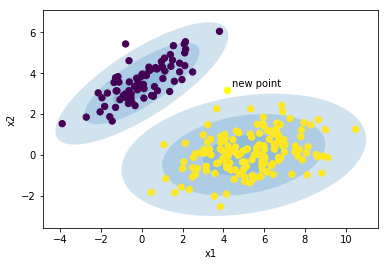

In [90]:
ax = plt.gca()

## Confusion. Maybe is not worthwhile
label_color = 'yellow' if label_new == 2 else 2

plot_gmm(initial_guess, X, label=labels, ax=ax)

ax.scatter(x_new[0], x_new[1], s=40, c=label_color, cmap='viridis', zorder=2)
ax.text( x_new[0]*1.05,x_new[1]*1.05, 'new point')
plt.xlabel('x1')
plt.ylabel('x2')